# 🌍 World Happiness Report Analysis (2015–2019)

This project analyzes the World Happiness Report datasets from 2015 to 2019.
The dataset contains country-level happiness scores and contributing factors
such as GDP, social support, life expectancy, freedom, generosity, and corruption.

The goal is to clean, normalize, and align data across years,
calculate Key Performance Indicators (KPIs),
and visualize how different factors impact happiness.


## Dataset Description

The World Happiness Report dataset is released every year.
Each file contains country-wise happiness scores and related factors.

Problems in the dataset:
- Column names are different every year
- Some values are missing
- Data needs to be combined for analysis

We solve these problems using simple cleaning and basic logic.

In [1]:
"""
This cell imports all the basic libraries required for the project.

pandas  -> for data loading and data handling
numpy   -> for numerical operations
matplotlib & seaborn -> for data visualization
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")


<Figure size 1000x600 with 0 Axes>

## Load the Datasets

Each year of the World Happiness Report is stored in a separate CSV file.
We load all the files and add a `Year` column to each dataset
so that we can analyze trends over time.


In [2]:
files = {
    2015: "2015.csv",
    2016: "2016.csv",
    2017: "2017.csv",
    2018: "2018.csv",
    2019: "2019.csv"
}

dfs = []

for year, file in files.items():
    df = pd.read_csv(file)
    df["Year"] = year
    dfs.append(df)

# Check shape of each dataset
for year, df in zip(files.keys(), dfs):
    print(year, df.shape)


2015 (158, 13)
2016 (157, 14)
2017 (155, 13)
2018 (156, 10)
2019 (156, 10)


## Understanding Column Differences

Column names change across different years.
For example:
- GDP is written as *Economy (GDP per Capita)* in some years
- Happiness Score appears as *Score* or *Happiness.Score*

To merge all datasets, we first normalize the column names.


In [3]:
"""
This function standardizes column names across different years
so that all datasets follow the same format.
"""

def clean_columns(df):
    df.columns = df.columns.str.strip()

    df = df.rename(columns={
        "Country or region": "Country",
        "Score": "Happiness Score",
        "Happiness.Score": "Happiness Score",
        "Economy (GDP per Capita)": "GDP",
        "GDP per capita": "GDP",
        "Family": "Social Support",
        "Social support": "Social Support",
        "Health (Life Expectancy)": "Life Expectancy",
        "Healthy life expectancy": "Life Expectancy",
        "Freedom to make life choices": "Freedom",
        "Trust (Government Corruption)": "Corruption",
        "Perceptions of corruption": "Corruption"
    })
    return df


## Merge All Years into One Dataset

After normalization:
* Select common columns
* Merge all years into a single dataframe

In [4]:
common_cols = [
    "Country", "Year", "Happiness Score", "GDP",
    "Social Support", "Life Expectancy",
    "Freedom", "Generosity", "Corruption"
]

cleaned_dfs = []

for df in dfs:
    df = clean_columns(df)
    df = df.reindex(columns=common_cols)
    cleaned_dfs.append(df)

df = pd.concat(cleaned_dfs, ignore_index=True)


## Handling Missing Values

Some countries do not appear every year,
which results in missing values.

We use a simple approach:
- Fill missing numeric values using column averages


In [5]:
df.fillna(df.mean(numeric_only=True), inplace=True)

df.isnull().sum()


,0
Country,0
Year,0
Happiness Score,0
GDP,0
Social Support,0
Life Expectancy,0
Freedom,0
Generosity,0
Corruption,0


## Key Performance Indicators (KPIs)

KPIs help us understand happiness data using simple graphs.
Each KPI uses basic logic such as averages, sorting, and comparison.


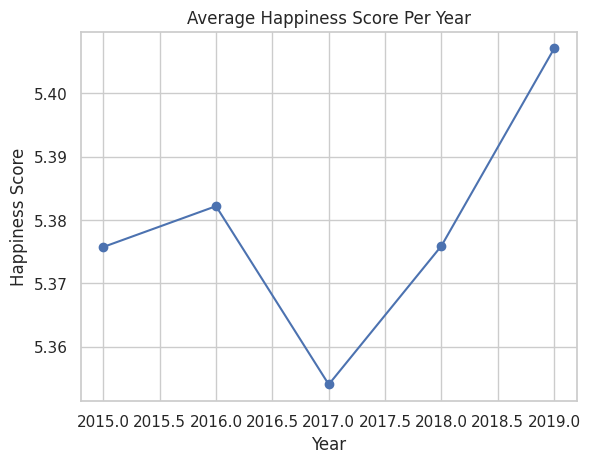

In [6]:
"""
KPI 1: Shows average happiness score for each year.
"""

avg_happiness = df.groupby("Year")["Happiness Score"].mean()

avg_happiness.plot(marker="o")
plt.title("Average Happiness Score Per Year")
plt.ylabel("Happiness Score")
plt.show()


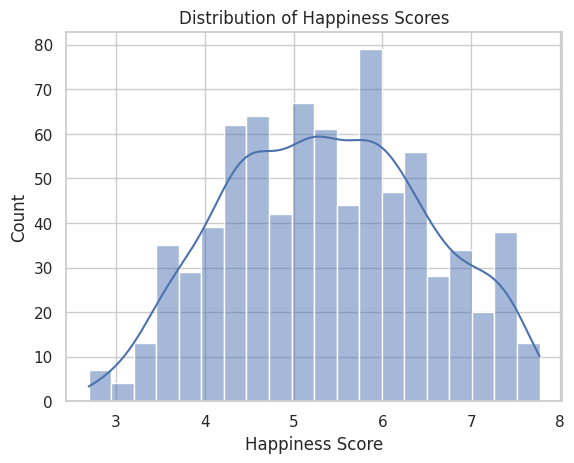

In [12]:
"""
KPI 2: Shows distribution of happiness scores across all countries.
"""

sns.histplot(df["Happiness Score"], bins=20, kde=True)
plt.title("Distribution of Happiness Scores")
plt.show()


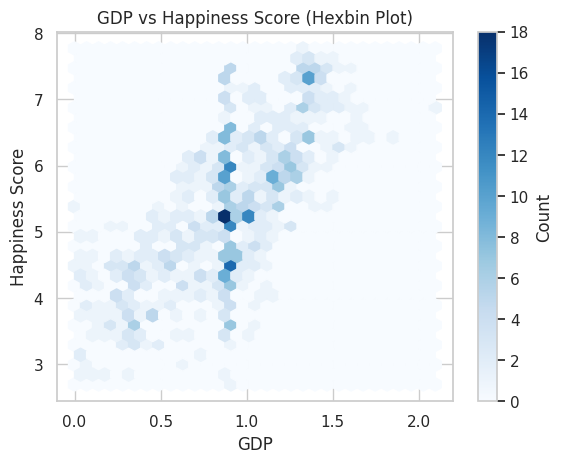

In [30]:
"""
KPI 3: Shows density relationship between GDP and Happiness Score.
"""

plt.hexbin(
    df["GDP"],
    df["Happiness Score"],
    gridsize=30,
    cmap="Blues"
)

plt.colorbar(label="Count")
plt.xlabel("GDP")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness Score (Hexbin Plot)")
plt.show()


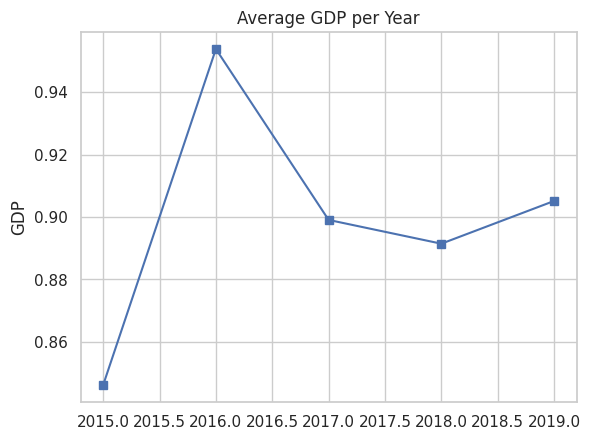

In [14]:
"""
KPI 4: Shows how average GDP changes over the years.
"""

avg_gdp = df.groupby("Year")["GDP"].mean()

plt.plot(avg_gdp.index, avg_gdp.values, marker="s")
plt.title("Average GDP per Year")
plt.ylabel("GDP")
plt.show()


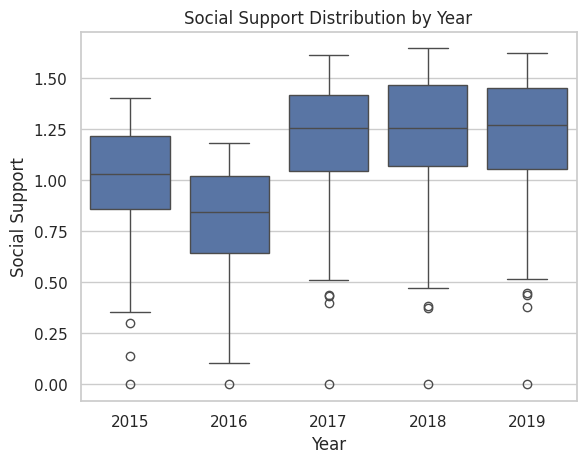

In [15]:
"""
KPI 5: Shows how happiness varies with social support.
"""

sns.boxplot(x="Year", y="Social Support", data=df)
plt.title("Social Support Distribution by Year")
plt.show()


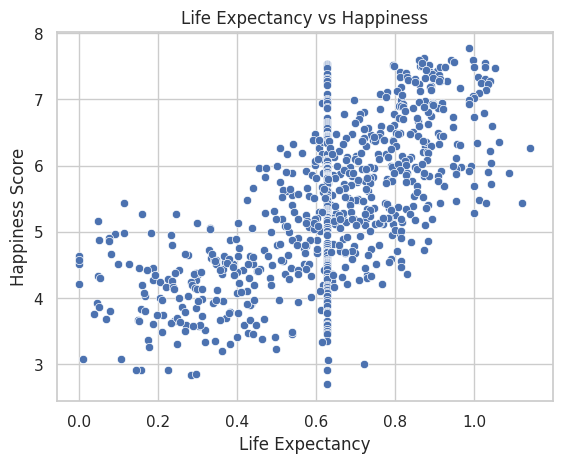

In [16]:
"""
KPI 6: Shows impact of life expectancy on happiness.
"""

sns.scatterplot(data=df, x="Life Expectancy", y="Happiness Score")
plt.title("Life Expectancy vs Happiness")
plt.show()


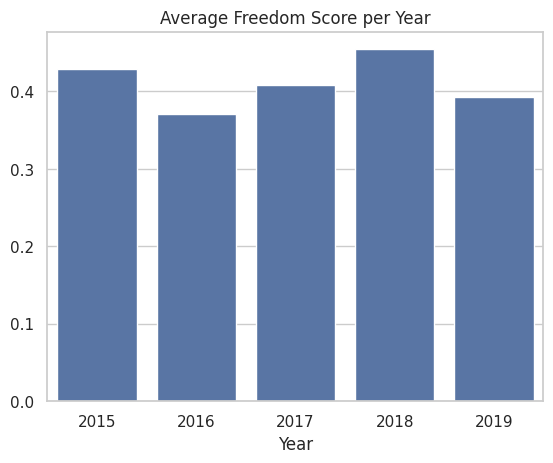

In [17]:
"""
KPI 7: Shows average freedom score per year.
"""

avg_freedom = df.groupby("Year")["Freedom"].mean()

sns.barplot(x=avg_freedom.index, y=avg_freedom.values)
plt.title("Average Freedom Score per Year")
plt.show()


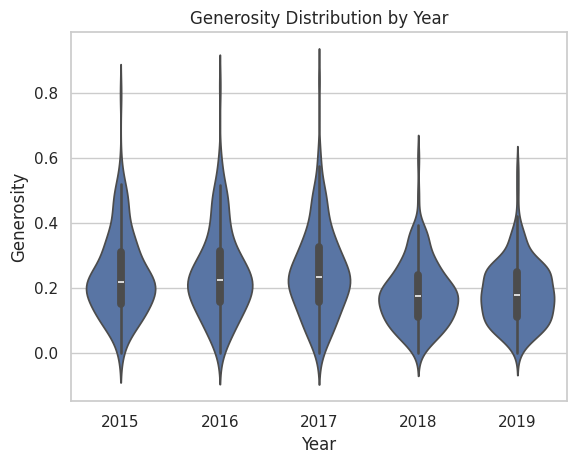

In [18]:
"""
KPI 8: Shows generosity distribution across years.
"""

sns.violinplot(x="Year", y="Generosity", data=df)
plt.title("Generosity Distribution by Year")
plt.show()


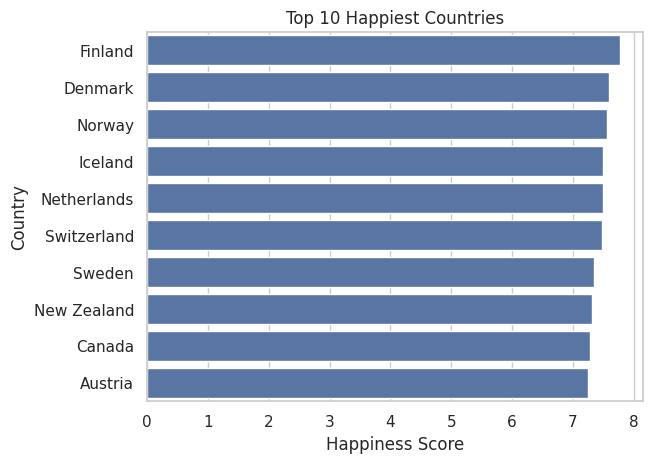

In [21]:
"""
KPI 9: Shows top 10 happiest countries for the latest year.
"""

latest_year = df["Year"].max()

top10 = (
    df[df["Year"] == latest_year]
    .sort_values("Happiness Score", ascending=False)
    .head(10)
)

sns.barplot(x="Happiness Score", y="Country", data=top10)
plt.title("Top 10 Happiest Countries")
plt.show()


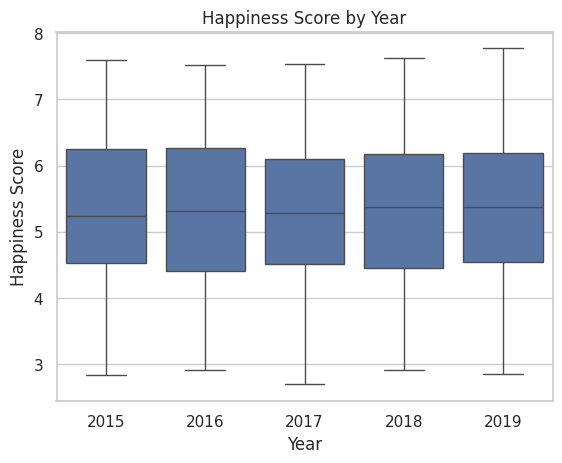

In [22]:
"""
KPI 10: Shows spread of happiness scores for each year.
"""

sns.boxplot(x="Year", y="Happiness Score", data=df)
plt.title("Happiness Score by Year")
plt.show()


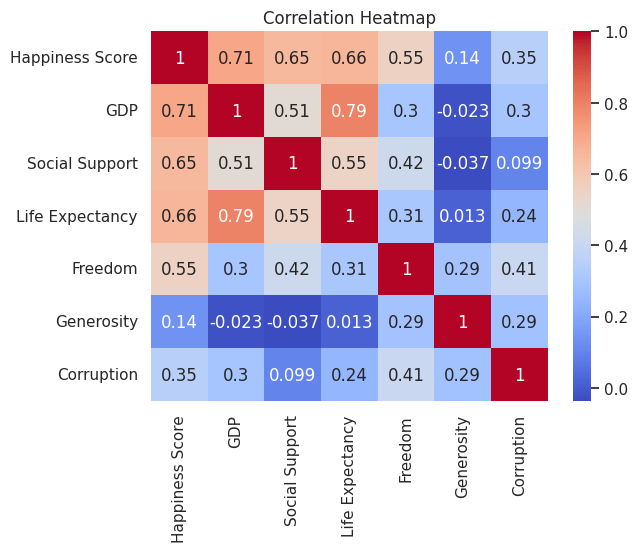

In [23]:
"""
KPI 11: Shows correlation between happiness factors.
"""

corr = df[
    ["Happiness Score", "GDP", "Social Support",
     "Life Expectancy", "Freedom", "Generosity", "Corruption"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


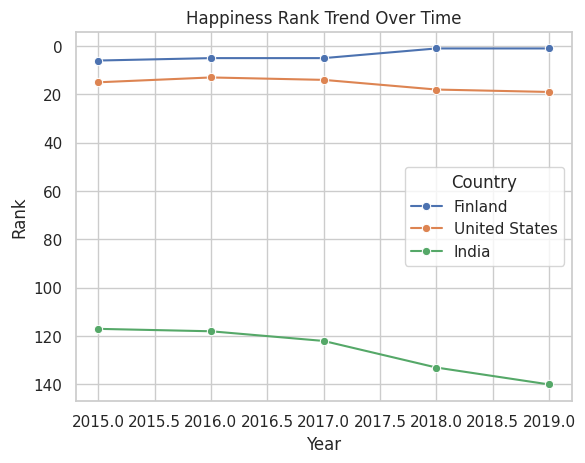

In [24]:
"""
KPI 12: Tracks rank changes of selected countries over time.
"""

df["Rank"] = df.groupby("Year")["Happiness Score"].rank(ascending=False)

countries = ["India", "Finland", "United States"]
country_data = df[df["Country"].isin(countries)]

sns.lineplot(data=country_data, x="Year", y="Rank", hue="Country", marker="o")
plt.gca().invert_yaxis()
plt.title("Happiness Rank Trend Over Time")
plt.show()


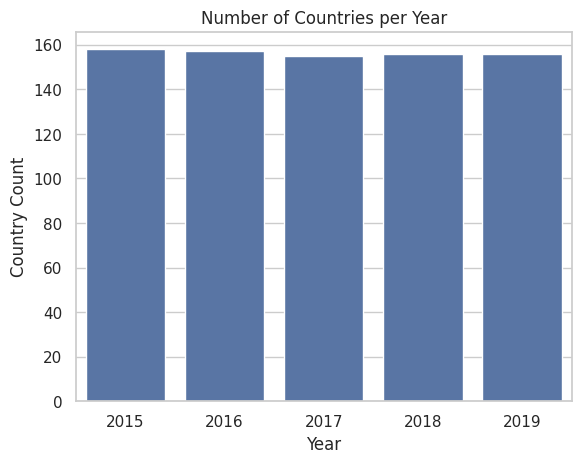

In [25]:
"""
KPI 13: Shows how many countries are reported each year.
"""

country_count = df.groupby("Year")["Country"].count()

sns.barplot(x=country_count.index, y=country_count.values)
plt.title("Number of Countries per Year")
plt.ylabel("Country Count")
plt.show()


## Final Output

After cleaning and analysis, we export the final dataset.
This file can be used for reports or further analysis.

In [11]:
df.to_csv("world_happiness_2015_2019_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
